## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is a practical project for A/B tests.

<a id='probability'></a>
#### Part I - Probability

First, import the libraries

In [213]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

a. Read in the dataset and take a look at the top few rows here:

In [214]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [215]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [216]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [217]:
df.query('converted == 1')['user_id'].nunique() / df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [218]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [219]:
sum([True for idx, row in df.iterrows() if any(row.isnull())])

0

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [220]:
# create df2
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]

In [221]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

How many unique **user_id**s are in **df2**?

In [222]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [223]:
dupid = df2.user_id.value_counts()
dupid = dupid[dupid > 1]
dupid

773192    2
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [224]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [225]:
df2.drop([1899], axis = 0, inplace = True)

/Users/wuzirong/Anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':



a. What is the probability of an individual converting regardless of the page they receive?

In [226]:
df2.query('converted == 1').user_id.nunique() / df2.user_id.nunique()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [227]:
(df2.query('group == "control"')['converted'] == 1).mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [228]:
(df2.query('group == "treatment"')['converted'] == 1).mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [229]:
df2.query('landing_page == "new_page"').user_id.nunique() / df2.user_id.nunique()

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**According to previous two results, there is no evidence showed one page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_{0}: p_{new} - p_{old} \leq 0$$

$$H_{1}: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.

a. What is the **convert rate** for $p_{new}$ under the null? 

In [230]:
pnew = df2.converted.mean()
pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [231]:
pold = df2.converted.mean()
pold

0.11959708724499628

c. What is $n_{new}$?

In [232]:
nnew = df2.query('group == "treatment"').user_id.nunique()
nnew

145310

d. What is $n_{old}$?

In [233]:
nold = df2.query('group == "control"').user_id.nunique()
nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [234]:
new_page_converted = np.random.binomial(nnew, p = pnew)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [235]:
old_page_converted = np.random.binomial(nold, p = pold)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [236]:
new_page_converted / nnew - old_page_converted / nold

0.00027988478397523997

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [237]:
p_diffs = []
for _ in range(int(1e4)):
    new_pc = np.random.binomial(nnew, p = pnew)
    old_pc = np.random.binomial(nold, p = pold)
    p_diffs.append(new_pc / nnew - old_pc / nold)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

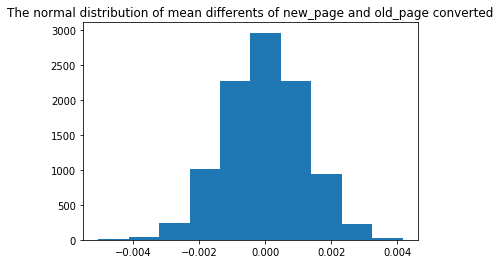

In [238]:
# convert p_diffs as numpy array
p_diffs = np.array(p_diffs)

# p_diffs simulation distribution
plt.hist(p_diffs)

plt.title('The normal distribution of mean differents of new_page and old_page converted');

Assume the $H_{o}: $ $P_{new}$ - $P_{old} = 0$ is true, we simulated the normal distribution of the $P_{new}$ - $P_{old}$ mean.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [239]:
# the actual diff observed in ad_data.csv
apnew = df2.query('group == "treatment"').converted.mean() # actual p new
apold = df2.query('group == "control"').converted.mean() # actual p old
actualdiff = apnew - apold
actualdiff

-0.0015782389853555567

In [240]:
(p_diffs > actualdiff).mean()

0.90439999999999998

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value in scientific studies called p-value. The p-value means the proportion of observing different between new page greater old page if the null hypothesis is true. Due to the p-value > alpha(Type I error rate which is 0.05), we fail to reject the null hypothesis which is the new page is not better than the old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [241]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 & group == "control"').count()[0]
convert_new = df2.query('converted == 1 & group == "treatment"').count()[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

In [242]:
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [243]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old])

In [244]:
z_score, p_value / 2

(-1.3109241984234394, 0.094941687240975514)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Since the z-test's default setting is 'two-sides' trial, the p-value should be 0.095 but also greater than alpha which is 0.05, the result is fail to reject the null hypothesis. So the answer is yes, they agree with the findings in part j. and k..**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

** Logistic Regression should be perform in this case. **

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [245]:
# create the intercept
df2['intercept'] = 1

# create the dummies
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])

/Users/wuzirong/Anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/wuzirong/Anaconda/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [246]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [247]:
# fit the Logist model
logist = sm.Logit(df2['converted'], df2[['intercept', 'treatment']])
res = logist.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [248]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 11 Dec 2017   Pseudo R-squ.:               8.077e-06
Time:                        20:20:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The two-tail p-value is 0.190. In the Logistic model, the null hypothesis and alternative hypothesis are different than Part II. They are :**

$$H_{0}: p_{new} - p_{old} = 0$$

$$H_{1}: p_{new} - p_{old} \neq 0$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**According to the aggregated A/B test, we will come across with Simpson's Paradox. So adding other factors can give us more evidence in more dimensions to prove the test. However, some disadvatages will come up such as the hypthesis test is the test confidence interval that has chance to raise test error instances of factors. **

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [249]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [250]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [251]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

In [252]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [253]:
### Fit Your Linear Model And Obtain the Results
logistic = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US']])
res = logistic.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 11 Dec 2017   Pseudo R-squ.:               1.521e-05
Time:                        20:20:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

** The null hypothesis and alternative hypothesis are:
$$ H_{0} : \beta_{UK} = 0 $$
$$ H_{1} : \beta_{UK} \neq 0 $$
AND
$$ H_{0} : \beta_{US} = 0 $$
$$ H_{1} : \beta_{US} \neq 0 $$ **

** The p-values of the dummies showed that they were not statistically significant so we are not able to reject both null hypothesis.**

<a id='conclusions'></a>
## Conclusions

** Part I shows there is no evidence showed one page leads to more conversions.
Part II shows the p-value is not statiscally significant so that we are not able to reject the null hypothesis.
Part III also shows that the p-values of additional factors are not statistically significant so that we are not able to reject the null hypothesis.
Overall, after applied simulation methods and regression methods, the results are consistent. However, the disadvantages of the hypothesis test is also existed. When we applied the hypothesis test, we still have to consider other dimension in order to avoid Simpson's Paradox. **
